## Create Maps of Stations and Velocity Profile Locations

Create a maps for the stations used in the study as well as the locations at which velocity profiles are extracted from the CRUST1.0 model.

For masking the land masses the following package has been used:

- Citation: global_land_mask package:
 Karin, Todd. Global Land Mask. October 5, 2020. https://doi.org/10.5281/zenodo.4066722

### Imports

In [1]:
from obspy import * 
from pandas import *
from os import listdir, uname
from global_land_mask import globe
from andbro__savefig import __savefig

import netCDF4 as nc
import numpy as np
import pygmt 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Configurations

In [4]:
config = {}

## specify directories
config['workdir'] = "/export/data/LNM/data/"
# config['workdir'] = "/home/andbro/kilauea-data/LNM/data/"
config['outdir_figures'] = config['workdir']+"figures_final/"

## define stations that are excluded from the analysis
config['excluded_stations'] = ['KAPI', 'TRQA', 'QSPA', 'FUNA', 'SAML', 'PAYG', 'SDV', 'TSUM']

### Read Station Coordinates

In [5]:
stations = read_csv(config['workdir']+"station_coordinates.csv")

In [6]:
vgrid_land = read_csv(config['workdir']+f"FINAL/velocity_profile_locations.csv")

In [66]:
def __makeplot_map(config, coordinates, stations, show_station_names=False):
    
    topo_data = '@earth_relief_06m'

    
    fig = pygmt.Figure()
    
    pygmt.config(FONT_ANNOT="8p,Helvetica,black")
    pygmt.config(FONT_LABEL="8p,Helvetica,black")

    reg  = 'g' # [minlon, maxlon, minlat, maxlat]
    proj = "Kf0/10c"

    # make color pallets
    pygmt.makecpt(
        cmap='geo',
        series='-8000/8000/1000',
        continuous=True,
    )    
    
    
    with fig.subplot(nrows=2, ncols=1, figsize=("15c", "10.5c"), autolabel=False, margins=["0.3c", "0.2c"]):

        ## PANEL 1 ----------

        fig.basemap(region=reg, projection=proj, panel=[0], frame=["af", "WSNE"])
                
        fig.grdimage(
            grid=topo_data,
            region=reg,
            projection=proj,
            panel=[0],
            shading=True,
            frame=False,
        )

        fig.coast(
            region=reg,
            projection=proj,
            panel=[0],
            shorelines=True,
            frame=["WSNE","f"],
            resolution="c",
        )

        fig.plot(
            x=coordinates['longitude'].astype(float),
            y=coordinates['latitude'].astype(float),
            region=reg,
            projection=proj,
            panel=[0],
            style='c0.02c',
            color='red',
            pen='red',
            no_clip=True,
            #label=stations['name'],
        )

        fig.text(text="a)", x=0, y=0, offset="-7.8c/2.7c", no_clip=True, fill="white", font="10")


        ## PANEL 2 ----------
    
        fig.basemap(region=reg, projection=proj, panel=[1], frame=["af", "WSnE"])
    
        fig.grdimage(
                     grid=topo_data,
                     region=reg,
                     panel=[1],
                     projection=proj,
                     shading=True,
                     frame=False,
                    )

        fig.coast(
                  region=reg,
                  projection=proj,
                  panel=[1],
                  shorelines=True,
                  frame=["WSNE","f"],
                  resolution="c",
                 )
            
        for i, station in stations.iterrows():
            if station['name'] not in config['excluded_stations']:
                fig.plot(
                    x=stations['longitude'].astype(float),
                    y=stations['latitude'].astype(float),
                    region=reg,
                    projection=proj,
                    style='t0.05i',
                    color='red',
                    pen='black',
                    no_clip=True,
                )

                if show_station_names:
                    fig.text(
                        x=stations['longitude'].astype(float),
                        y=stations['latitude'].astype(float),
                #         text=range(len(stations['name'])),
                        text=stations['name'],
                        font="3p,Helvetica,black",
                        no_clip=True,
                        xshift=0.1,
                        yshift=0.1,
                    )


        fig.colorbar(
#             frame='+l"Elevation (m)"',
            frame = '+l" "',
            position="x2.35c/-0.7c+w6c+jTC+h",
        )
    
        fig.text(text="Elevation (m)", x=0, y=0, offset="-2.5c/-3.7c", no_clip=True, fill="white")
        
        fig.text(text="b)", x=0, y=0, offset="-7.8c/2.7c", no_clip=True, fill="white", font="10")
    
        fig.show();

    return fig

### Plotting

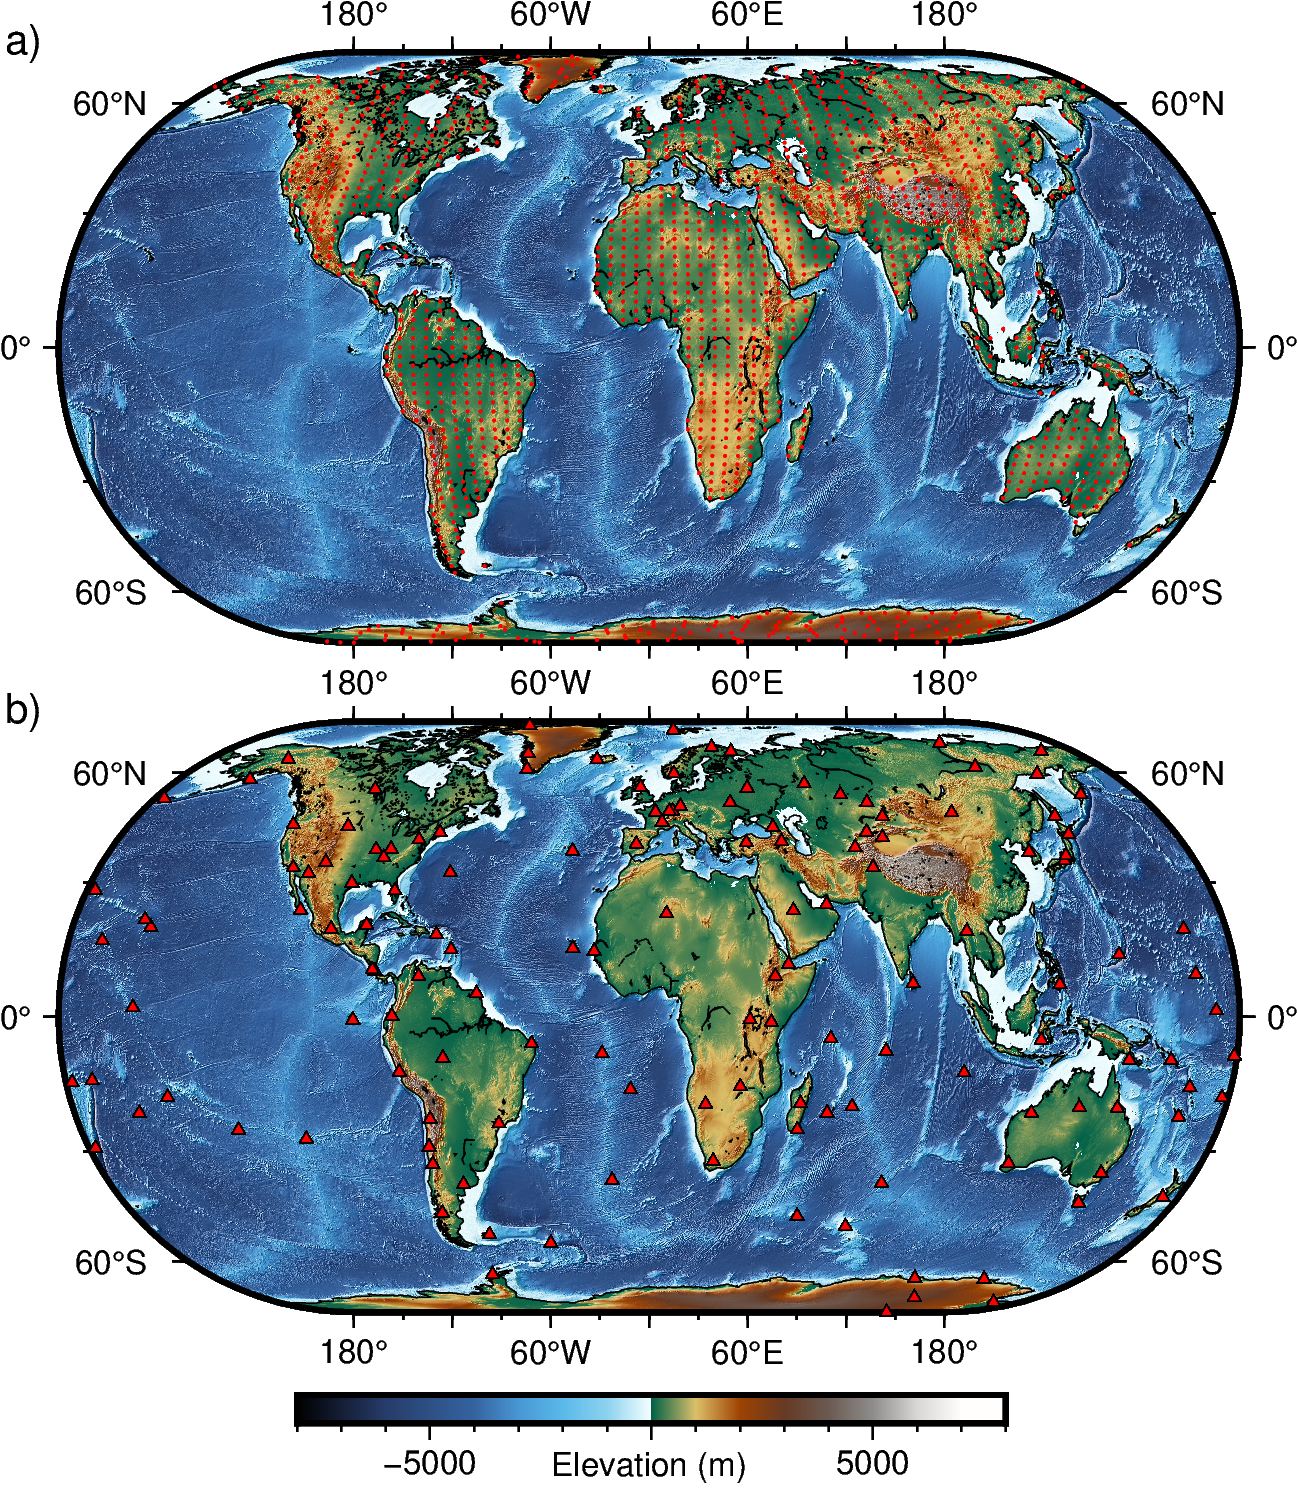

In [67]:
fig = __makeplot_map(config, vgrid_land, stations, show_station_names=False)

In [68]:
# fig.savefig(config['outdir_figures']+"maps_final"+".png", anti_alias=True, dpi=300, transparent=None)
# fig.savefig(config['outdir_figures']+"maps_final"+".pdf", anti_alias=True, dpi=300, transparent=None)